# Name = Harsh Yadav 
# Roll No - 1240259025

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('netflix.csv',lineterminator = '\n')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Preprocessing


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [9]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [10]:
df[['duration_value', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
text_cols = ['type', 'title', 'director', 'country', 'rating', 'listed_in', 'description']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [13]:
print("\nAfter Cleaning:\n", df.info())
print("\nSample data:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   cast            7982 non-null   object        
 5   country         8807 non-null   object        
 6   date_added      8709 non-null   datetime64[ns]
 7   release_year    8807 non-null   int64         
 8   rating          8807 non-null   object        
 9   duration        8804 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  year_added      8709 non-null   float64       
 13  month_added     8709 non-null   object        
 14  duration_value  8804 non-null   float64       
 15  dura

In [14]:
df.to_csv("netflix_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'netflix_cleaned.csv'")


✅ Cleaned dataset saved as 'netflix_cleaned.csv'


# Business-Oriented Analysis Questions
# 1. What is the ratio of Movies vs TV Shows on Netflix?

In [15]:
df.columns = df.columns.str.strip().str.lower()

In [16]:
type_counts = df['type'].value_counts()

In [17]:
print("📊 Count of each type:")
print(type_counts)

📊 Count of each type:
type
movie      6131
tv show    2676
Name: count, dtype: int64


In [18]:
ratio = type_counts['movie'] / type_counts['tv show']
print(f"\n🎥 Movie : 📺 TV Show Ratio = {ratio:.2f} : 1")


🎥 Movie : 📺 TV Show Ratio = 2.29 : 1


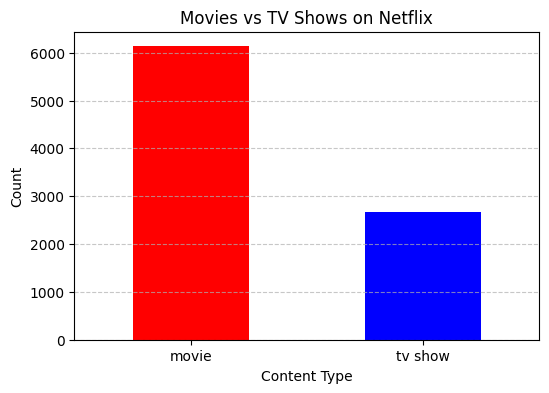

In [19]:
plt.figure(figsize=(6,4))
type_counts.plot(kind='bar', color=['red', 'blue'])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Q.2 Which genres are most popular on Netflix globally?


In [20]:
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

In [21]:
print("🎬 Top 10 Most Popular Genres on Netflix:")
print(genre_counts.head(10))

🎬 Top 10 Most Popular Genres on Netflix:
listed_in
international movies        2752
dramas                      2427
comedies                    1674
international tv shows      1351
documentaries                869
action & adventure           859
tv dramas                    763
independent movies           756
children & family movies     641
romantic movies              616
Name: count, dtype: int64


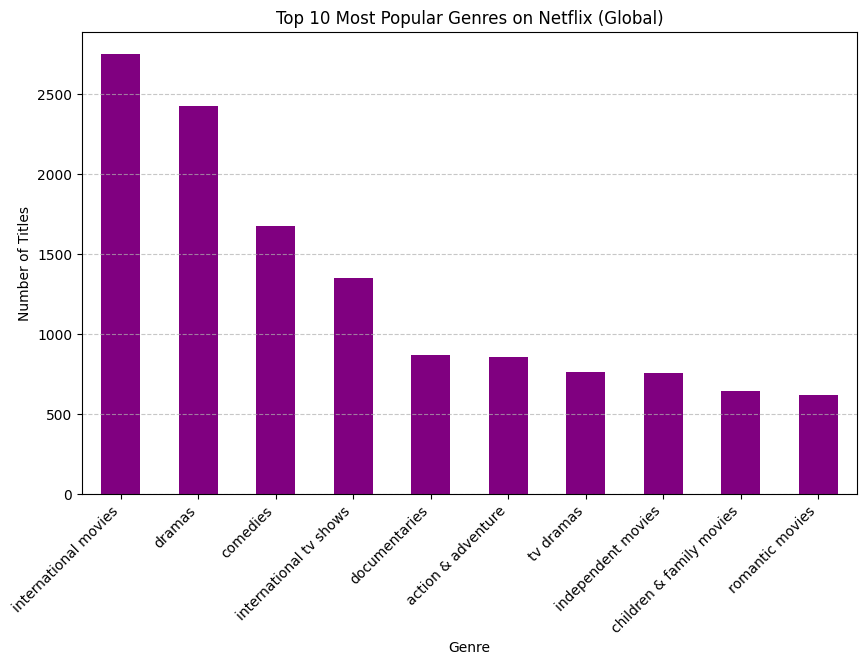

In [22]:
plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Most Popular Genres on Netflix (Global)")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Q.3 Which years saw the highest release of content on Netflix? 

📆 Top 10 Years with Most Netflix Releases:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


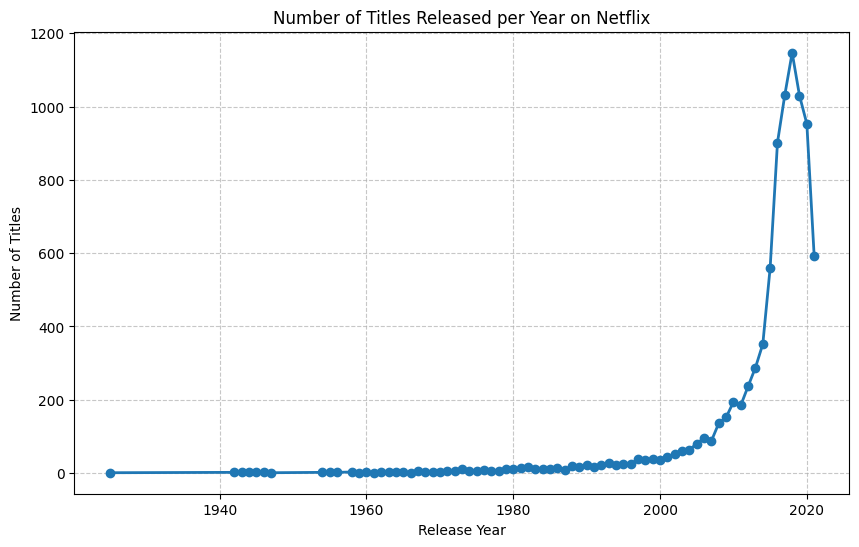

In [23]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


yearly_counts = df['release_year'].value_counts().sort_index()


print("📆 Top 10 Years with Most Netflix Releases:")
print(yearly_counts.sort_values(ascending=False).head(10))


plt.figure(figsize=(10,6))
yearly_counts.plot(kind='line', marker='o', linewidth=2)
plt.title("Number of Titles Released per Year on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 4. Which countries produce the most Netflix content?

In [24]:
df.columns = df.columns.str.strip().str.lower()

In [25]:
country_counts = df['country'].str.split(',').explode().str.strip().value_counts()

In [26]:
print("🌎 Top 10 Content-Producing Countries on Netflix:")
print(country_counts.head(10))

🌎 Top 10 Content-Producing Countries on Netflix:
country
united states     3690
india             1046
nan                831
united kingdom     806
canada             445
france             393
japan              318
spain              232
south korea        231
germany            226
Name: count, dtype: int64


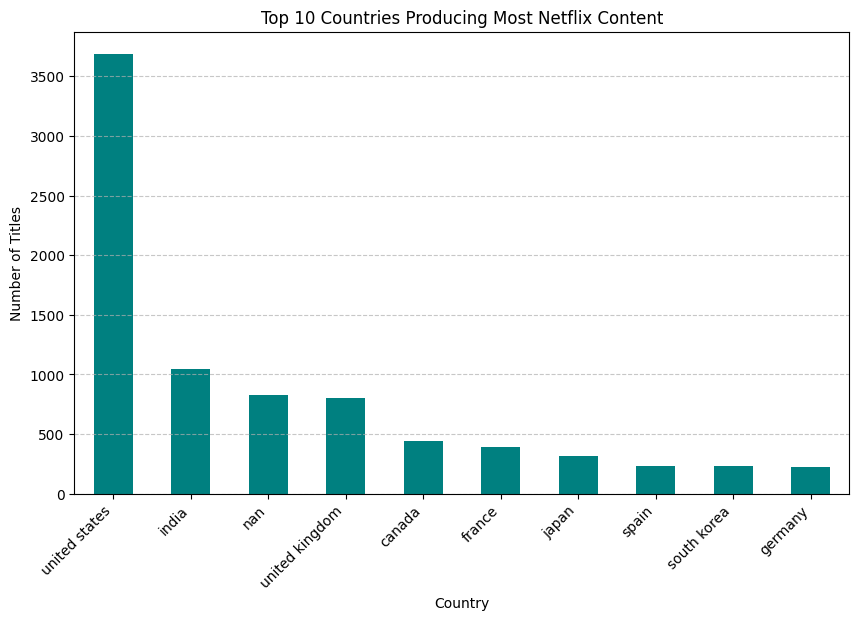

In [27]:
plt.figure(figsize=(10,6))
country_counts.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Countries Producing Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Q 5. How has the trend of adding new content evolved year by year?

In [28]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

In [29]:
df = df.dropna(subset=['release_year'])

In [30]:
yearly_trend = df.groupby('release_year').size().reset_index(name='content_count')

In [31]:
yearly_trend = yearly_trend.sort_values('release_year')

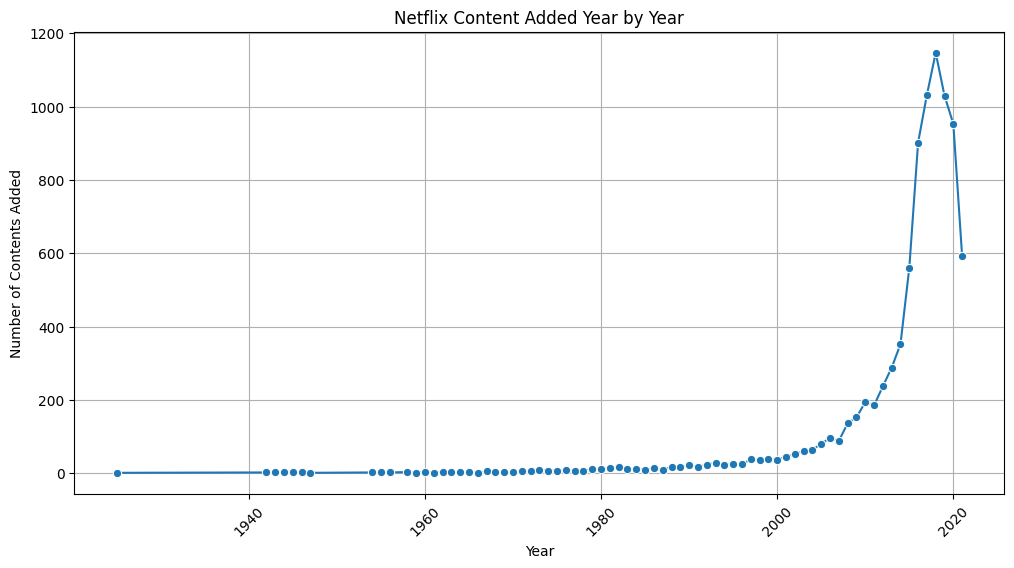

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_trend, x='release_year', y='content_count', marker='o')
plt.title("Netflix Content Added Year by Year")
plt.xlabel("Year")
plt.ylabel("Number of Contents Added")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2. User Demographics & Targeting
# 6. Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?

Most Frequent Ratings on Netflix:

rating
tv-ma    3207
tv-14    2160
tv-pg     863
r         799
pg-13     490
tv-y7     334
tv-y      307
pg        287
tv-g      220
nr         80
Name: count, dtype: int64


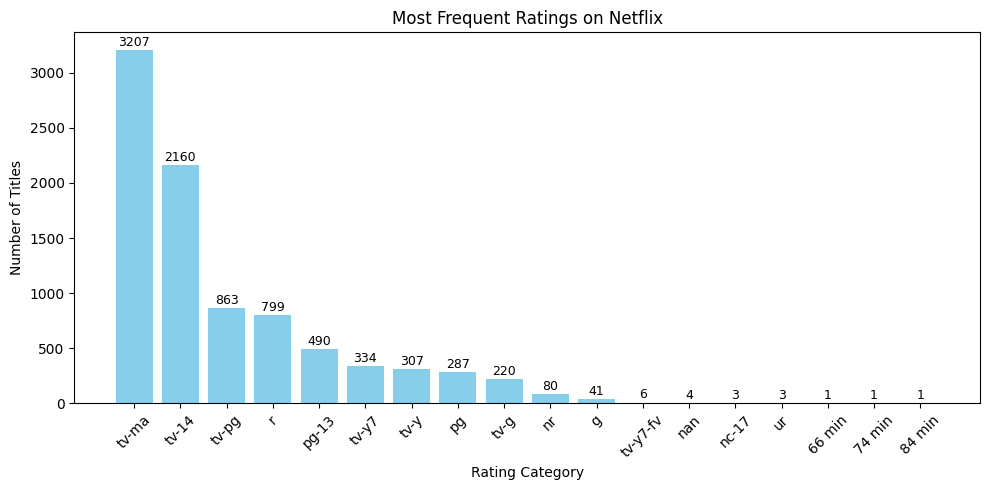

In [33]:
df = df.dropna(subset=['rating'])
rating_counts = df['rating'].value_counts()
print("Most Frequent Ratings on Netflix:\n")
print(rating_counts.head(10))
plt.figure(figsize=(10,5))
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title("Most Frequent Ratings on Netflix")
plt.xlabel("Rating Category")
plt.ylabel("Number of Titles")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), 
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Q 7. Do some countries tend to produce more mature content (TV-MA)?

Top 10 Countries Producing Mature (TV-MA) Content:

country
united states     928
nan               276
india             248
united kingdom    177
spain             119
japan              87
south korea        85
france             80
mexico             77
turkey             63
Name: count, dtype: int64


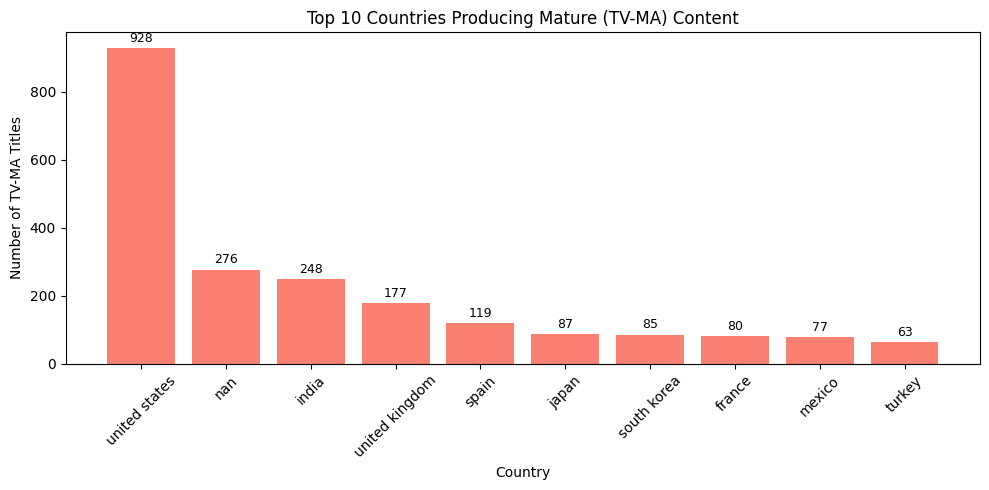

In [34]:
mature = df[df['rating'] == 'tv-ma']

# Count how many TV-MA titles each country has
country_mature_counts = mature['country'].value_counts().head(10)

# Display top 10 countries producing most mature content
print("Top 10 Countries Producing Mature (TV-MA) Content:\n")
print(country_mature_counts)

# Plot the data
plt.figure(figsize=(10,5))
bars = plt.bar(country_mature_counts.index, country_mature_counts.values, color='salmon')
plt.title("Top 10 Countries Producing Mature (TV-MA) Content")
plt.xlabel("Country")
plt.ylabel("Number of TV-MA Titles")

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval),
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Q 8. Which genres are more associated with TV Shows vs Movies?


Top 10 Genres for Movies:
 genre
international movies        2752
dramas                      2427
comedies                    1674
documentaries                869
action & adventure           859
independent movies           756
children & family movies     641
romantic movies              616
thrillers                    577
music & musicals             375
Name: count, dtype: int64

Top 10 Genres for TV Shows:
 genre
international tv shows    1351
tv dramas                  763
tv comedies                581
crime tv shows             470
kids' tv                   451
docuseries                 395
romantic tv shows          370
reality tv                 255
british tv shows           253
anime series               176
Name: count, dtype: int64


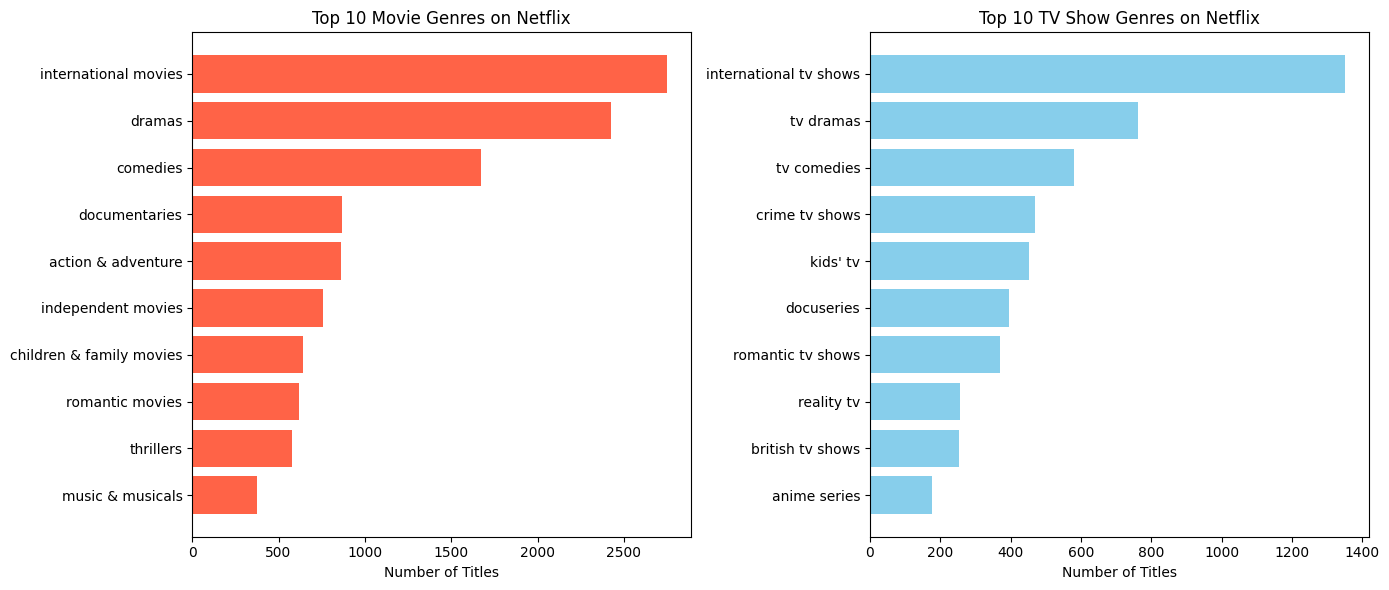

In [35]:
df = df.dropna(subset=['type', 'listed_in'])

# Split multiple genres into separate rows
df_expanded = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
df_expanded['genre'] = df_expanded['genre'].str.strip()

# Count top 10 genres for Movies and TV Shows separately
movie_genres = df_expanded[df_expanded['type'] == 'movie']['genre'].value_counts().head(10)
tvshow_genres = df_expanded[df_expanded['type'] == 'tv show']['genre'].value_counts().head(10)

# --- Print output ---
print("\nTop 10 Genres for Movies:\n", movie_genres)
print("\nTop 10 Genres for TV Shows:\n", tvshow_genres)

# --- Plot both side-by-side ---
plt.figure(figsize=(14,6))

# Movies
plt.subplot(1,2,1)
plt.barh(movie_genres.index[::-1], movie_genres.values[::-1], color='tomato')
plt.title('Top 10 Movie Genres on Netflix')
plt.xlabel('Number of Titles')

# TV Shows
plt.subplot(1,2,2)
plt.barh(tvshow_genres.index[::-1], tvshow_genres.values[::-1], color='skyblue')
plt.title('Top 10 TV Show Genres on Netflix')
plt.xlabel('Number of Titles')

plt.tight_layout()
plt.show()


# Q 9. Which genres dominate the U.S. vs other countries?

Top 10 Genres in the United States:
 genre
dramas                      835
comedies                    680
documentaries               512
action & adventure          404
children & family movies    390
independent movies          390
thrillers                   292
tv comedies                 258
tv dramas                   232
romantic movies             225
Name: count, dtype: int64

Top 10 Genres in Other Countries:
 genre
international movies        3513
dramas                      3202
comedies                    1981
international tv shows      1465
action & adventure          1182
documentaries               1118
independent movies          1040
tv dramas                    852
children & family movies     845
thrillers                    806
Name: count, dtype: int64


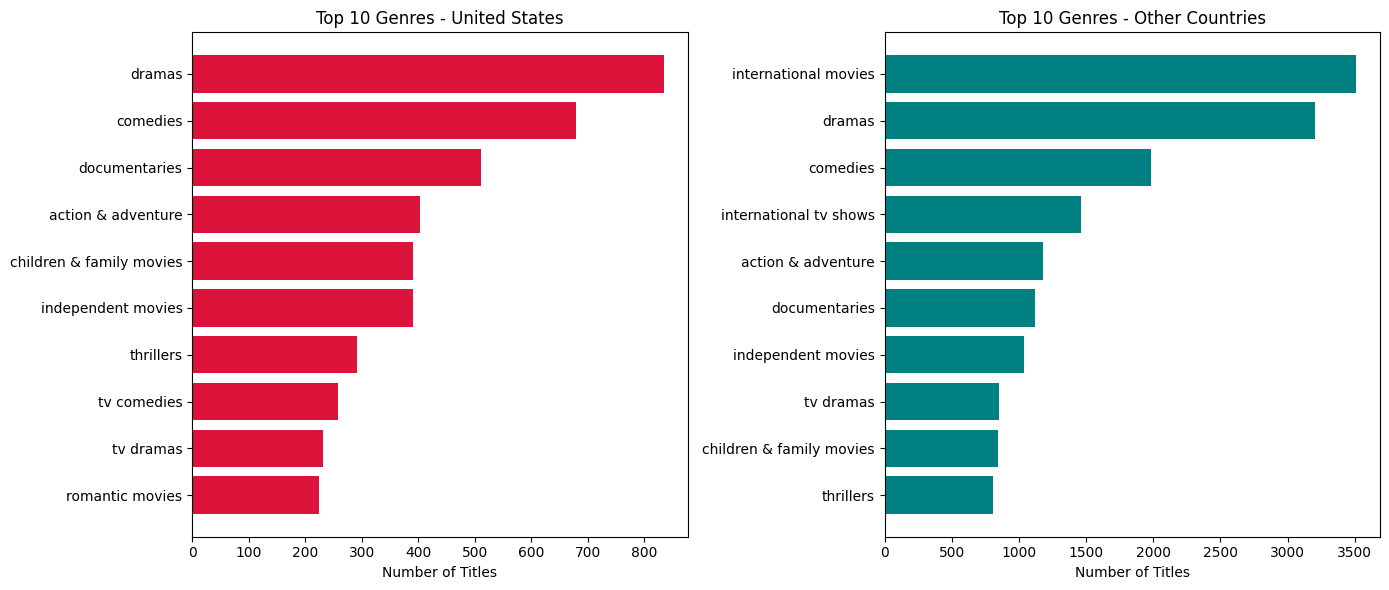

In [36]:
df = df.dropna(subset=['country', 'listed_in'])

# Split multiple countries and genres
df_expanded = df.assign(country=df['country'].str.split(','), genre=df['listed_in'].str.split(','))
df_expanded = df_expanded.explode('country').explode('genre')
df_expanded['country'] = df_expanded['country'].str.strip()
df_expanded['genre'] = df_expanded['genre'].str.strip()


# --- Separate U.S. and Non-U.S. ---
us_data = df_expanded[df_expanded['country'] == 'united states']
non_us_data = df_expanded[df_expanded['country'] != 'United States']

# --- Count top genres ---
us_genres = us_data['genre'].value_counts().head(10)
non_us_genres = non_us_data['genre'].value_counts().head(10)

# --- Print top genres ---
print("Top 10 Genres in the United States:\n", us_genres)
print("\nTop 10 Genres in Other Countries:\n", non_us_genres)

# --- Plot comparison ---
plt.figure(figsize=(14,6))

# U.S.
plt.subplot(1,2,1)
plt.barh(us_genres.index[::-1], us_genres.values[::-1], color='crimson')
plt.title('Top 10 Genres - United States')
plt.xlabel('Number of Titles')

# Non-U.S.
plt.subplot(1,2,2)
plt.barh(non_us_genres.index[::-1], non_us_genres.values[::-1], color='teal')
plt.title('Top 10 Genres - Other Countries')
plt.xlabel('Number of Titles')

plt.tight_layout()
plt.show()



# 10. What genres are most popular in the last 3 years?


Analyzing popular genres for the last 3 years: [np.int64(2019), np.int64(2020), np.int64(2021)]

Top 10 Genres in the Last 3 Years:
 genre
international movies        662
international tv shows      564
dramas                      530
comedies                    362
tv dramas                   343
tv comedies                 252
documentaries               234
crime tv shows              226
children & family movies    205
docuseries                  178
Name: count, dtype: int64


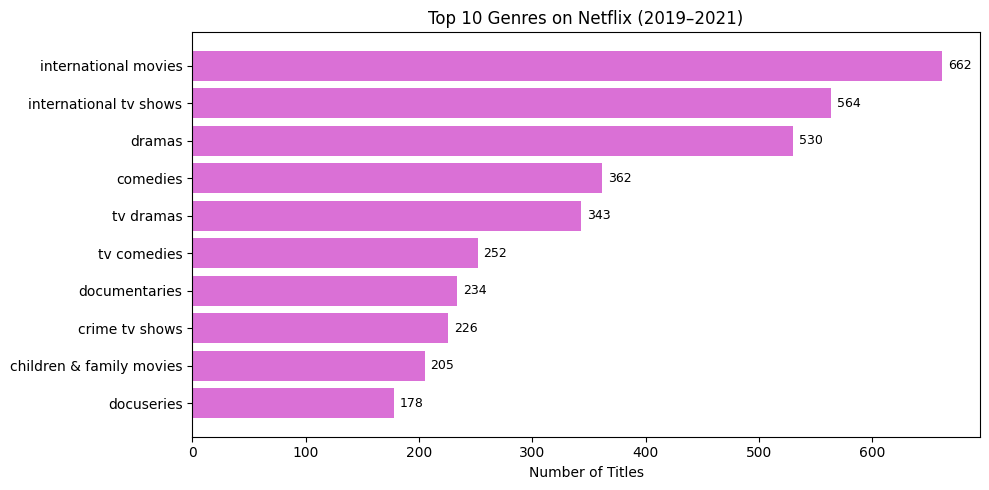

In [37]:
df = df.dropna(subset=['release_year', 'listed_in'])

# Convert year to numeric (if not already)
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Define recent years (last 3 years from the latest year in dataset)
latest_year = df['release_year'].max()
recent_years = [latest_year - 2, latest_year - 1, latest_year]

print(f"\nAnalyzing popular genres for the last 3 years: {recent_years}\n")

# Filter data for those years
recent_df = df[df['release_year'].isin(recent_years)]

# Split multiple genres into separate rows
recent_expanded = recent_df.assign(genre=recent_df['listed_in'].str.split(',')).explode('genre')
recent_expanded['genre'] = recent_expanded['genre'].str.strip()

# Count top 10 genres
top_recent_genres = recent_expanded['genre'].value_counts().head(10)

# Display results
print("Top 10 Genres in the Last 3 Years:\n", top_recent_genres)

# --- Plot ---
plt.figure(figsize=(10,5))
bars = plt.barh(top_recent_genres.index[::-1], top_recent_genres.values[::-1], color='orchid')
plt.title(f"Top 10 Genres on Netflix ({recent_years[0]}–{latest_year})")
plt.xlabel("Number of Titles")

# Add value labels
for bar in bars:
    yval = bar.get_width()
    plt.text(yval + 5, bar.get_y() + bar.get_height()/2, int(yval),
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


#  Q 11. Who are the top 10 directors with the most Netflix content?

Top 10 Directors with the Most Netflix Content:

director
nan                    2634
rajiv chilaka            22
jan suter                21
raúl campos              19
marcus raboy             16
suhas kadav              16
jay karas                15
cathy garcia-molina      13
martin scorsese          12
youssef chahine          12
Name: count, dtype: int64


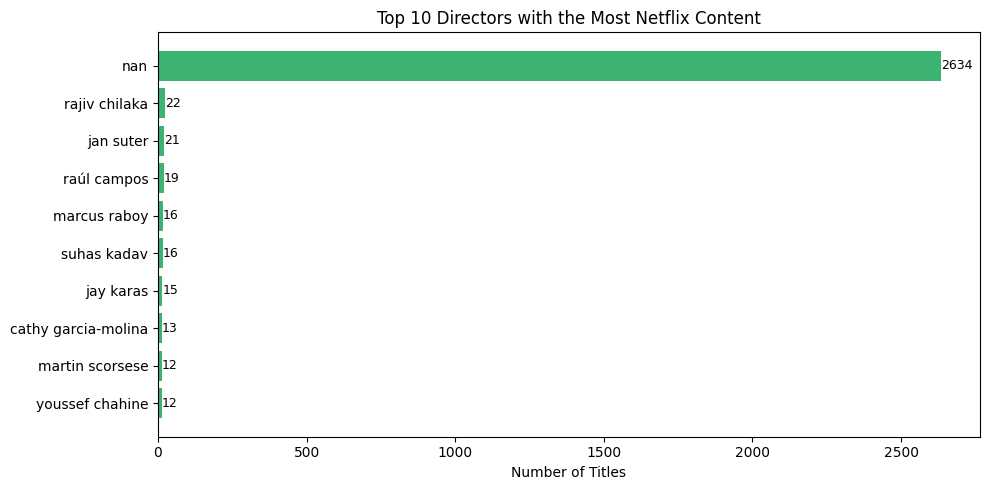

In [38]:
df = df.dropna(subset=['director'])

# Split multiple directors if listed together
df_expanded = df.assign(director=df['director'].str.split(',')).explode('director')
df_expanded['director'] = df_expanded['director'].str.strip()

# Count top 10 directors by number of titles
top_directors = df_expanded['director'].value_counts().head(10)

# Display results
print("Top 10 Directors with the Most Netflix Content:\n")
print(top_directors)

# --- Plot ---
plt.figure(figsize=(10,5))
bars = plt.barh(top_directors.index[::-1], top_directors.values[::-1], color='mediumseagreen')
plt.title("Top 10 Directors with the Most Netflix Content")
plt.xlabel("Number of Titles")

# Add value labels
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, int(xval),
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


# Q12. Which actors appear most frequently in Netflix shows?

Top 10 Most Frequent Actors on Netflix:

actor
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


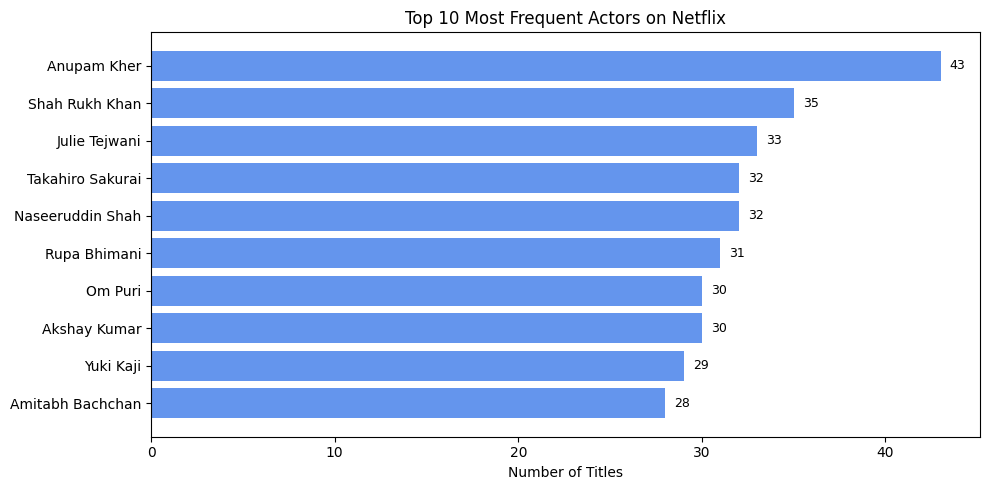

In [39]:
df = df.dropna(subset=['cast'])

# Split multiple actors from a single cell
df_expanded = df.assign(actor=df['cast'].str.split(',')).explode('actor')
df_expanded['actor'] = df_expanded['actor'].str.strip()

# Count top 10 most frequent actors
top_actors = df_expanded['actor'].value_counts().head(10)

# Display results
print("Top 10 Most Frequent Actors on Netflix:\n")
print(top_actors)

# --- Plot ---
plt.figure(figsize=(10,5))
bars = plt.barh(top_actors.index[::-1], top_actors.values[::-1], color='cornflowerblue')
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Titles")

# Add value labels
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, int(xval),
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


#  Q 13. Which director-genre pairs are most frequent?

Top 10 Director–Genre Pairs on Netflix:

     director                   genre  count
7136      nan  international tv shows   1135
7155      nan               tv dramas    696
7154      nan             tv comedies    518
7137      nan                kids' tv    395
7129      nan          crime tv shows    350
7144      nan       romantic tv shows    329
7125      nan        british tv shows    187
7131      nan              docuseries    171
7124      nan            anime series    162
7142      nan              reality tv    160


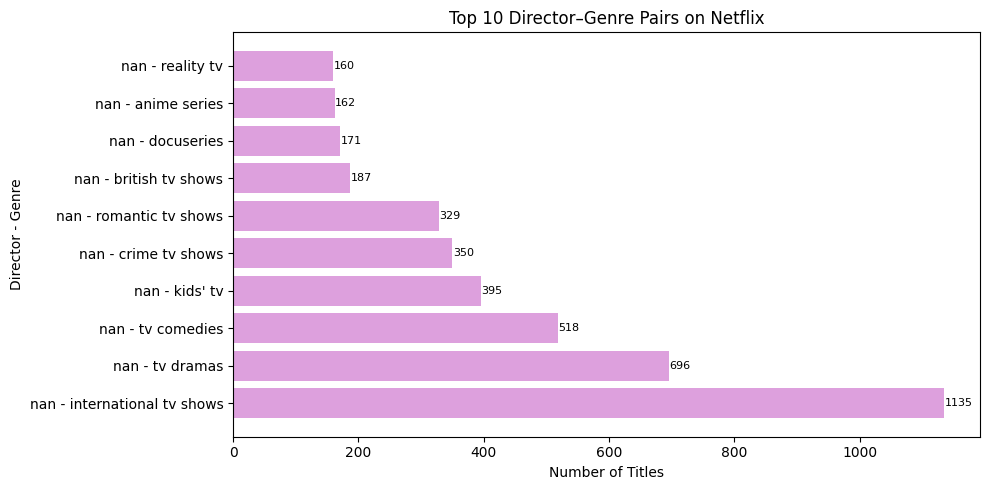

In [40]:
#df = df.dropna(subset=['director', 'listed_in'])

# Split multiple directors and genres into separate rows
df_expanded = df.assign(
    director=df['director'].str.split(','),
    genre=df['listed_in'].str.split(',')
).explode('director').explode('genre')

# Clean text (remove extra spaces)
df_expanded['director'] = df_expanded['director'].str.strip()
df_expanded['genre'] = df_expanded['genre'].str.strip()

# Count the most common director-genre pairs
pair_counts = df_expanded.groupby(['director', 'genre']).size().reset_index(name='count')
top_pairs = pair_counts.sort_values(by='count', ascending=False).head(10)

# Display the results
print("Top 10 Director–Genre Pairs on Netflix:\n")
print(top_pairs)

# --- Plot ---
plt.figure(figsize=(10,5))
bars = plt.barh(top_pairs['director'] + ' - ' + top_pairs['genre'], top_pairs['count'], color='plum')
plt.title("Top 10 Director–Genre Pairs on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director - Genre")

# Add value labels
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.5, bar.get_y() + bar.get_height()/2, int(xval),
             va='center', fontsize=8)

plt.tight_layout()
plt.show()


# Q 14. How many titles have unknown directors or cast members?

In [41]:
print(df[df['director'] == 'nan'].shape)
print(df[df['cast'] == 'nan'].shape)

(2282, 16)
(0, 16)


# Q 17. Is there a trend in movie durations over the years?

In [42]:
movies = df[df['type'] == 'movie']

# Ensure duration_value column is numeric
movies['duration_value'] = pd.to_numeric(movies['duration_value'], errors='coerce')

# Calculate average duration
average_duration = movies['duration_value'].mean()

print("🎬 Netflix Movie Duration Analysis\n")
print(f"Total Movies: {len(movies)}")
print(f"Average Movie Duration: {average_duration:.2f} minutes")


🎬 Netflix Movie Duration Analysis

Total Movies: 5656
Average Movie Duration: 101.36 minutes


C:\Users\yvhar\AppData\Local\Temp\ipykernel_21172\4271525048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_value'] = pd.to_numeric(movies['duration_value'], errors='coerce')


# Q 16. What’s the most common number of seasons for TV shows?

📺 Netflix TV Show Seasons Analysis

Total TV Shows: 2326
Most Common Number of Seasons: 1.0


C:\Users\yvhar\AppData\Local\Temp\ipykernel_21172\647722933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration_value'] = pd.to_numeric(tv_shows['duration_value'], errors='coerce')


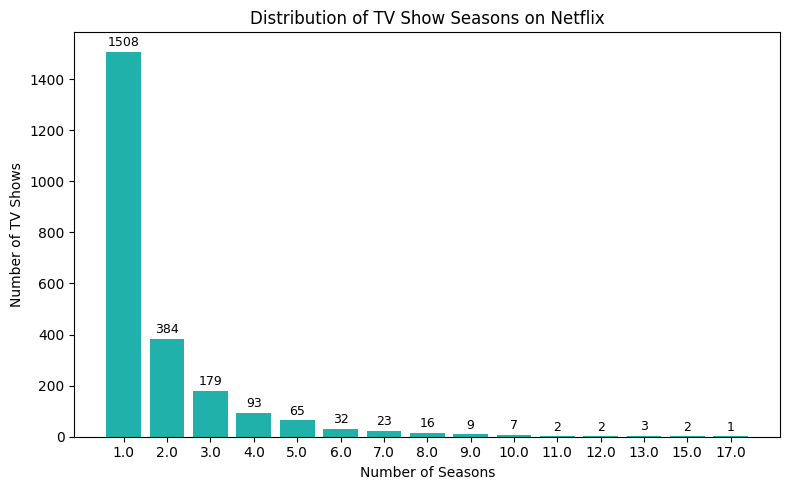

In [43]:

tv_shows = df[df['type'] == 'tv show']

# Convert the duration_value column to numeric (it represents seasons for TV Shows)
tv_shows['duration_value'] = pd.to_numeric(tv_shows['duration_value'], errors='coerce')

# Find the most common number of seasons
most_common_seasons = tv_shows['duration_value'].mode()[0]

# Count frequency of each season count
season_counts = tv_shows['duration_value'].value_counts().sort_index()

print("📺 Netflix TV Show Seasons Analysis\n")
print(f"Total TV Shows: {len(tv_shows)}")
print(f"Most Common Number of Seasons: {most_common_seasons}")

# --- Plot ---
plt.figure(figsize=(8,5))
bars = plt.bar(season_counts.index.astype(str), season_counts.values, color='lightseagreen')
plt.title("Distribution of TV Show Seasons on Netflix")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval),
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Q 17. Is there a trend in movie durations over the years? 

C:\Users\yvhar\AppData\Local\Temp\ipykernel_21172\209925979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_value'] = pd.to_numeric(movies['duration_value'], errors='coerce')
C:\Users\yvhar\AppData\Local\Temp\ipykernel_21172\209925979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce')


🎬 Average Movie Duration by Year:

release_year
2012    101.351190
2013    100.716346
2014    101.389558
2015    100.922865
2016     97.346939
2017     97.438519
2018     97.763610
2019     95.395062
2020     94.125532
2021     98.840164
Name: duration_value, dtype: float64


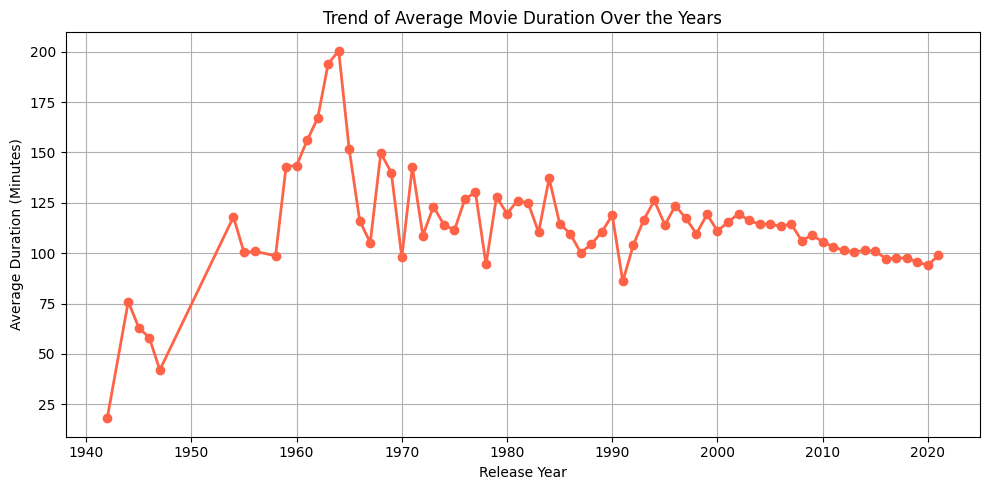

In [44]:

movies = df[df['type'] == 'movie']

# Ensure numeric duration and year
movies['duration_value'] = pd.to_numeric(movies['duration_value'], errors='coerce')
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce')

# Group by release year and calculate average duration
duration_trend = movies.groupby('release_year')['duration_value'].mean().dropna()

# Display results
print("🎬 Average Movie Duration by Year:\n")
print(duration_trend.tail(10))  # Show last 10 years

# --- Plot the trend ---
plt.figure(figsize=(10,5))
plt.plot(duration_trend.index, duration_trend.values, color='tomato', marker='o', linewidth=2)
plt.title("Trend of Average Movie Duration Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Q 18.In which months does Netflix add the most content?

📅 Number of Titles Added Per Month:

month_name
January      671
February     500
March        665
April        680
May          564
June         652
July         740
August       672
September    679
October      686
November     649
December     734
Name: count, dtype: int64


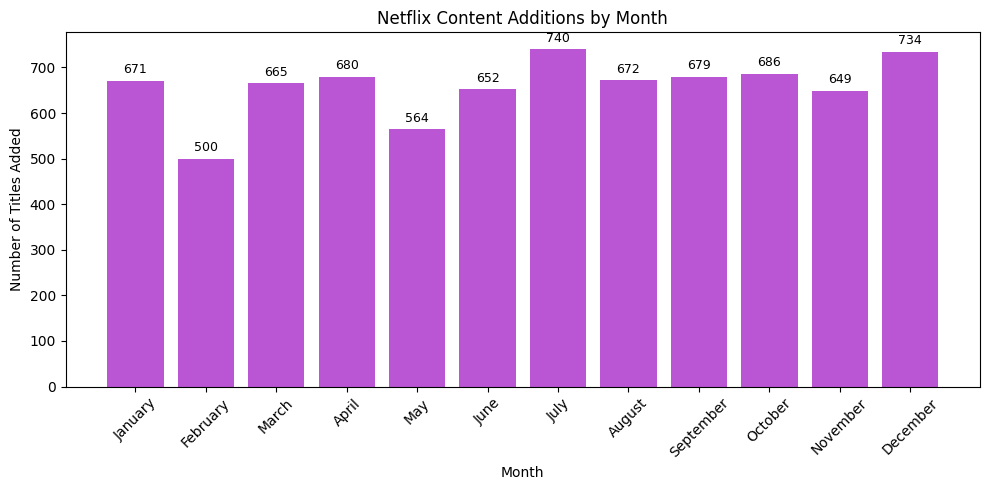

In [45]:

df = df.dropna(subset=['date_added'])

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month number and month name
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()

# Count how many titles were added per month
month_counts = df['month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Display result
print("📅 Number of Titles Added Per Month:\n")
print(month_counts.dropna())

# --- Plot ---
plt.figure(figsize=(10,5))
bars = plt.bar(month_counts.index, month_counts.values, color='mediumorchid')
plt.title("Netflix Content Additions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    if not pd.isna(yval):
        plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval),
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Q 19. How does the genre distribution vary across different years?

C:\Users\yvhar\AppData\Local\Temp\ipykernel_21172\611689491.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

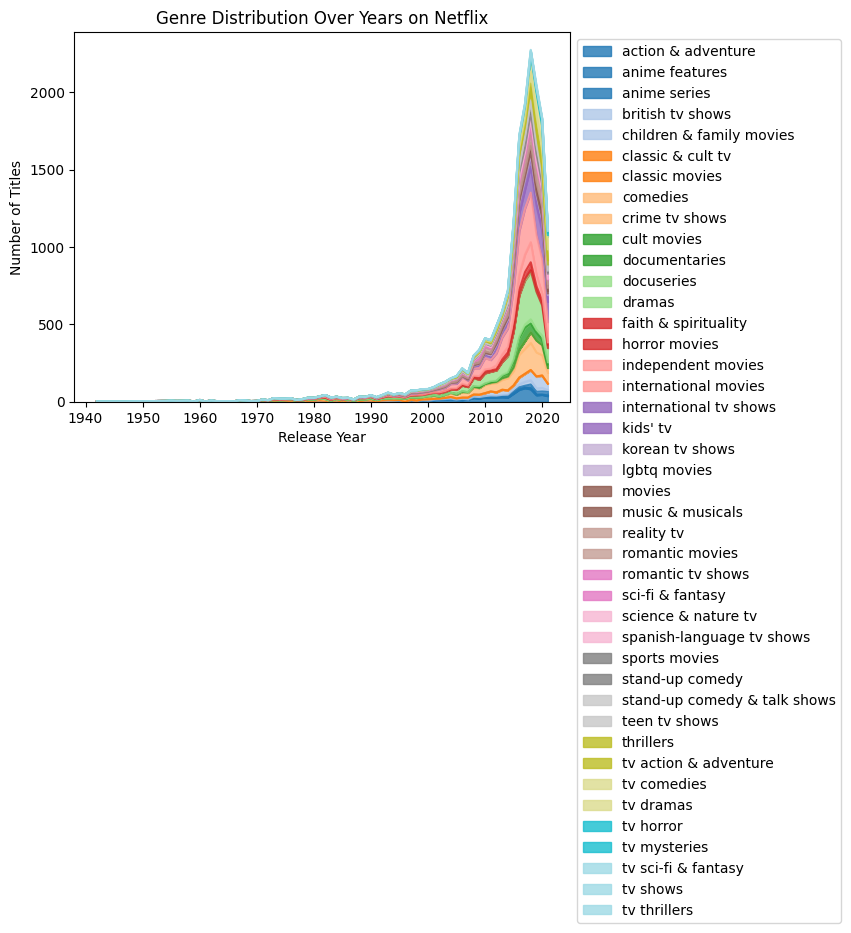

In [46]:

df = df.dropna(subset=['release_year', 'listed_in'])

# Convert release_year to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Split multiple genres into separate rows
df_expanded = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
df_expanded['genre'] = df_expanded['genre'].str.strip()

# Group by release_year and genre, then count
genre_year_counts = df_expanded.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Pivot table for plotting
genre_pivot = genre_year_counts.pivot(index='release_year', columns='genre', values='count').fillna(0)

# Plot stacked area chart
plt.figure(figsize=(14,6))
genre_pivot.plot(kind='area', stacked=True, cmap='tab20', alpha=0.8)
plt.title("Genre Distribution Over Years on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()


# Q 20. Which countries produce the most content in each genre?

In [48]:

df = df.dropna(subset=['country', 'listed_in'])

# Split multiple countries and genres into separate rows
df_expanded = df.assign(
    country=df['country'].str.split(','),
    genre=df['listed_in'].str.split(',')
).explode('country').explode('genre')

# Clean whitespace
df_expanded['country'] = df_expanded['country'].str.strip()
df_expanded['genre'] = df_expanded['genre'].str.strip()

# Group by genre and country, then count titles
genre_country_counts = df_expanded.groupby(['genre', 'country']).size().reset_index(name='count')

# For each genre, get the country with the most content
top_countries_per_genre = genre_country_counts.sort_values('count', ascending=False).groupby('genre').first().reset_index()

# Display results
print("Top Country Producing Content in Each Genre:\n")
print(top_countries_per_genre[['genre', 'country', 'count']])


Top Country Producing Content in Each Genre:

                           genre         country  count
0             action & adventure   united states    403
1                 anime features           japan     60
2                   anime series           japan    138
3               british tv shows  united kingdom    177
4       children & family movies   united states    381
5              classic & cult tv   united states     11
6                 classic movies   united states     74
7                       comedies   united states    679
8                 crime tv shows   united states    101
9                    cult movies   united states     51
10                 documentaries   united states    267
11                    docuseries   united states     81
12                        dramas   united states    832
13          faith & spirituality   united states     40
14                 horror movies   united states    199
15            independent movies   united states    390
16